In [1]:
# This script is for DNN
# Take Dataset3 LA for example

## DNN Test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
# Dataset3 LA 70%
X_sociodemo_test_passed = pd.read_csv("../Data/04 Data for RF and DNN Optimal Parameters Search/03 70%_LA_1000/X_sociodemo_train.csv", index_col = 'GEOID')
y = pd.read_csv("../Data/04 Data for RF and DNN Optimal Parameters Search/03 70%_LA_1000/y_train.csv", index_col = 'GEOID', squeeze=True)

In [4]:
# Standardization function
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

In [5]:
# standardization
X_sociodemo_test_passed_stats = X_sociodemo_test_passed.describe().transpose()
X_sociodemo_std_test_passed = standarize_data(X_sociodemo_test_passed, X_sociodemo_test_passed_stats)

In [6]:
X_sociodemo_std_test_passed.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% age >=60,% <highschool,median income,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density
GEOID,,,,,,,,,,,,,,,,,,,,,
6037127605,-0.537586,-0.582476,-0.529395,-0.313309,1.104420,1.061871,0.482587,0.095613,0.929692,-0.740365,...,-1.585875,0.352341,-0.653274,1.043023,0.838052,0.847270,-0.481129,1.270596,1.236740,-0.066809
6037271701,0.315565,-0.344506,1.058270,-0.313309,-1.135039,-0.373882,-0.331044,1.016475,0.355969,-0.019730,...,0.387220,-1.284473,0.741908,-0.046961,-0.828159,-0.989969,1.189477,0.672191,0.451401,-0.139733
6037276000,-0.309528,0.433843,0.161749,-0.313309,-0.877705,0.372034,1.068546,-0.913940,-0.565337,-0.000216,...,1.392640,-1.214710,1.674632,-1.645477,-1.171245,-1.108526,0.695803,-0.749022,-1.545460,-0.813701
6037213202,-0.573898,-0.152943,1.362836,-0.313309,0.603311,0.189137,-0.561046,0.188019,0.485140,-0.671926,...,0.184585,0.635467,-0.766447,0.739299,0.754804,0.090627,-0.166894,-1.197827,0.854968,0.897401
6037239601,0.774167,0.764452,-1.006678,2.543368,1.077250,0.485459,-0.137465,-0.082622,0.493744,-0.723575,...,-1.439261,1.329780,-0.811968,-0.645736,1.148933,0.692339,-0.860298,-0.449820,0.551518,0.412777


In [7]:
X_sociodemo_std_test_passed.shape

(663, 21)

In [8]:
# Quick run before tuning hyperparameters
tf.random.set_seed(42)
# https://cnbeining.github.io/deep-learning-with-python-cn/4-advanced-multi-layer-perceptrons-and-keras/ch16-reduce-overfitting-with-dropout-regularization.html
dnn_model = keras.models.Sequential([
    keras.layers.Dense(256,activation="relu"), # Dense means fully connected.
    keras.layers.Dropout(0.2), # prevent overfitting
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])

In [9]:
history = dnn_model.fit(x=X_sociodemo_std_test_passed, y=y, validation_split=0.1, epochs=50, verbose=2)

Epoch 1/50
19/19 - 1s - loss: 25.1155 - mean_squared_error: 668.6744 - val_loss: 17.6023 - val_mean_squared_error: 361.3930 - 624ms/epoch - 33ms/step
Epoch 2/50
19/19 - 0s - loss: 9.7552 - mean_squared_error: 163.8233 - val_loss: 7.4974 - val_mean_squared_error: 73.6900 - 53ms/epoch - 3ms/step
Epoch 3/50
19/19 - 0s - loss: 6.3618 - mean_squared_error: 72.9937 - val_loss: 4.8213 - val_mean_squared_error: 31.7220 - 47ms/epoch - 2ms/step
Epoch 4/50
19/19 - 0s - loss: 5.0040 - mean_squared_error: 41.6956 - val_loss: 4.6273 - val_mean_squared_error: 31.4610 - 44ms/epoch - 2ms/step
Epoch 5/50
19/19 - 0s - loss: 4.4701 - mean_squared_error: 36.4003 - val_loss: 3.8078 - val_mean_squared_error: 23.0997 - 46ms/epoch - 2ms/step
Epoch 6/50
19/19 - 0s - loss: 4.1733 - mean_squared_error: 28.7980 - val_loss: 3.9912 - val_mean_squared_error: 23.0038 - 45ms/epoch - 2ms/step
Epoch 7/50
19/19 - 0s - loss: 4.0439 - mean_squared_error: 27.3121 - val_loss: 3.9401 - val_mean_squared_error: 21.5808 - 52ms/ep

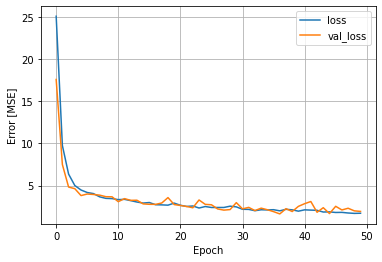

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [11]:
#make prediction
y_pred = dnn_model.predict(X_sociodemo_std_test_passed)

#evaluate with groud truth
y_pred_r2 = r2_score(y, y_pred)
y_pred_rsme = mean_squared_error(y, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

0.8552316221131264
2.053674620776247


## Hyperparameter tuning

In [25]:
import os

In [26]:
def build_model(hp):
    model = keras.models.Sequential()
    
    for i in range(hp.Int("num_layer",1,10)):
        model.add(keras.layers.Dense(units=hp.Int("neuron_"+str(i),16,256, step=16), activation="relu"))
        
        for j in range(hp.Int("num_drop_layer_"+str(i),0,1)):
            model.add(keras.layers.Dropout(0.2))
            
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer="adam",loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
    
    return model

tuner = RandomSearch(build_model, objective="val_loss", max_trials=50, executions_per_trial=5 ,seed=42, overwrite=True, directory=os.path.normpath('C:/Users/yhu42/yhu42/hyper')) # directory=os.path.normpath('C:/Users/ryanz/Desktop/')
# Integer, the total number of trials (model configurations) to test at most. Note that the oracle may interrupt the search before `max_trial` models have been tested if the search space has been exhausted. Defaults to 10.
# The number of models that should be built and fit for each trial.

In [27]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
neuron_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
num_drop_layer_0 (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 1, 'step': 1, 'sampling': None}


In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
tuner.search(X_sociodemo_std_test_passed, y, validation_split=0.1, epochs=50, callbacks=[early_stop], verbose=2)

Trial 50 Complete [00h 00m 10s]
val_loss: 1.9674826622009278

Best val_loss So Far: 1.0385831236839294
Total elapsed time: 00h 10m 48s
INFO:tensorflow:Oracle triggered exit


In [29]:
tuner.results_summary()

Results summary
Results in C:\Users\yhu42\yhu42\hyper\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layer: 5
neuron_0: 160
num_drop_layer_0: 1
neuron_1: 16
num_drop_layer_1: 0
neuron_2: 176
num_drop_layer_2: 1
neuron_3: 128
num_drop_layer_3: 0
neuron_4: 160
num_drop_layer_4: 1
neuron_5: 176
num_drop_layer_5: 0
neuron_6: 96
num_drop_layer_6: 0
neuron_7: 48
num_drop_layer_7: 1
neuron_8: 176
num_drop_layer_8: 1
neuron_9: 176
num_drop_layer_9: 1
Score: 1.0385831236839294
Trial summary
Hyperparameters:
num_layer: 5
neuron_0: 176
num_drop_layer_0: 1
neuron_1: 208
num_drop_layer_1: 0
neuron_2: 64
num_drop_layer_2: 0
neuron_3: 208
num_drop_layer_3: 0
neuron_4: 208
num_drop_layer_4: 0
neuron_5: 240
num_drop_layer_5: 0
neuron_6: 160
num_drop_layer_6: 0
neuron_7: 176
num_drop_layer_7: 0
neuron_8: 96
num_drop_layer_8: 1
neuron_9: 112
num_drop_layer_9: 0
Score: 1.048986053466797
Trial summary
Hyperparameters:
num_layer: 9
neur

In [30]:
best_hps = tuner.get_best_hyperparameters()[0]
layer_count = best_hps.get("num_layer")
print("The number of layer is: "+ str(layer_count))
for i in range(layer_count):
  print("Neuron for layer_"+str(i)+" is: "+str(best_hps.get("neuron_"+str(i))))
  print("Dropout for layer_"+str(i)+" is: "+str(best_hps.get("num_drop_layer_"+str(i))))

The number of layer is: 5
Neuron for layer_0 is: 160
Dropout for layer_0 is: 1
Neuron for layer_1 is: 16
Dropout for layer_1 is: 0
Neuron for layer_2 is: 176
Dropout for layer_2 is: 1
Neuron for layer_3 is: 128
Dropout for layer_3 is: 0
Neuron for layer_4 is: 160
Dropout for layer_4 is: 1


In [21]:
tf.random.set_seed(42)
dnn_model = keras.models.Sequential([
    keras.layers.Dense(160,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(176,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(160,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])

In [19]:
# Quick run on tuned hyperparameters

dnn_model = keras.models.Sequential([
    keras.layers.Dense(160,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(176,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(160,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

In [22]:
history = dnn_model.fit(x=X_sociodemo_std_test_passed, y=y, validation_split=0.1, epochs=50, callbacks=[early_stop], verbose=0)

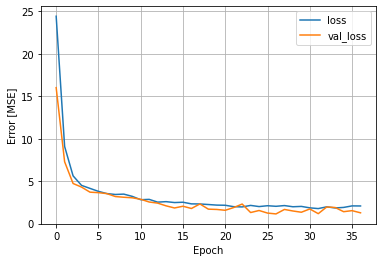

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [24]:
#make prediction
y_pred = dnn_model.predict(X_sociodemo_std_test_passed)

#evaluate with groud truth
y_pred_r2 = r2_score(y, y_pred)
y_pred_rsme = mean_squared_error(y, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

0.9423493395433965
1.2959759002794795
